#Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt #Libraries for visualization
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from matplotlib import colors as mcolors
from scipy import stats #Library for statistical analysis 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import metrics


#Get to know your data

In [3]:
data = pd.read_csv("/content/drive/MyDrive/VI semester/ML/datasets/letter-recognition.data")

In [4]:
columns = ['capital_letter','x_box', 'y_box',	'width_box','height_box', 'ON_pix', 'x_bar_mean',
           'y_bar_mean',	'x2bar',	'y2bar',	'xybar',	'x2ybr',
           'xy2br',	'x-edge', 'x_edge_y',	'y_edge', 'y_edge_x']

In [5]:
data.columns = columns

In [5]:
print(data)

      capital_letter  x_box  y_box  width_box  height_box  ON_pix  x_bar_mean  \
0                  I      5     12          3           7       2          10   
1                  D      4     11          6           8       6          10   
2                  N      7     11          6           6       3           5   
3                  G      2      1          3           1       1           8   
4                  S      4     11          5           8       3           8   
...              ...    ...    ...        ...         ...     ...         ...   
19994              D      2      2          3           3       2           7   
19995              C      7     10          8           8       4           4   
19996              T      6      9          6           7       5           6   
19997              S      2      3          4           2       1           8   
19998              A      4      9          6           6       2           9   

       y_bar_mean  x2bar  y

#Clean the data

In [6]:
data.isnull().sum()

capital_letter    0
x_box             0
y_box             0
width_box         0
height_box        0
ON_pix            0
x_bar_mean        0
y_bar_mean        0
x2bar             0
y2bar             0
xybar             0
x2ybr             0
xy2br             0
x-edge            0
x_edge_y          0
y_edge            0
y_edge_x          0
dtype: int64

The dataset is already cleansed, no null values present.

#Visualization

<h2> Feature histograms

In [ ]:
def visualize(number_of_features, feature_names, number_of_classes, X, y, target_names):
  colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
  
  fig = plt.figure(figsize=(10, 10))
  fig.subplots(nrows=2, ncols=2)
  for feat_i in range(number_of_features): #For each feature, we have a new subplot
      ax = plt.subplot(2,2, feat_i+1)
      plt.title(feature_names[feat_i]) 
      sns.distplot(X[:,feat_i]) #Once we have a specific feature, we draw the histogram of the feature's data (X[:,i] means we get the i'th column of X)
      for class_i in range(number_of_classes): #After that we draw the within-class histograms of the same feature
          sns.distplot(X[y == class_i,feat_i], color=colors[class_i], label=target_names[class_i]) # (X[y==c,i] means we get the i'th column of X where the class in the same row in y is equal to c
      plt.legend()
  plt.show()

In [8]:
X = data.iloc[:, 1:]
y = data.iloc[:, :1]
number_of_features = len(columns)-1
feature_names = columns[1:] 
number_of_classes = len(np.unique(y))
target_names = np.unique(y)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

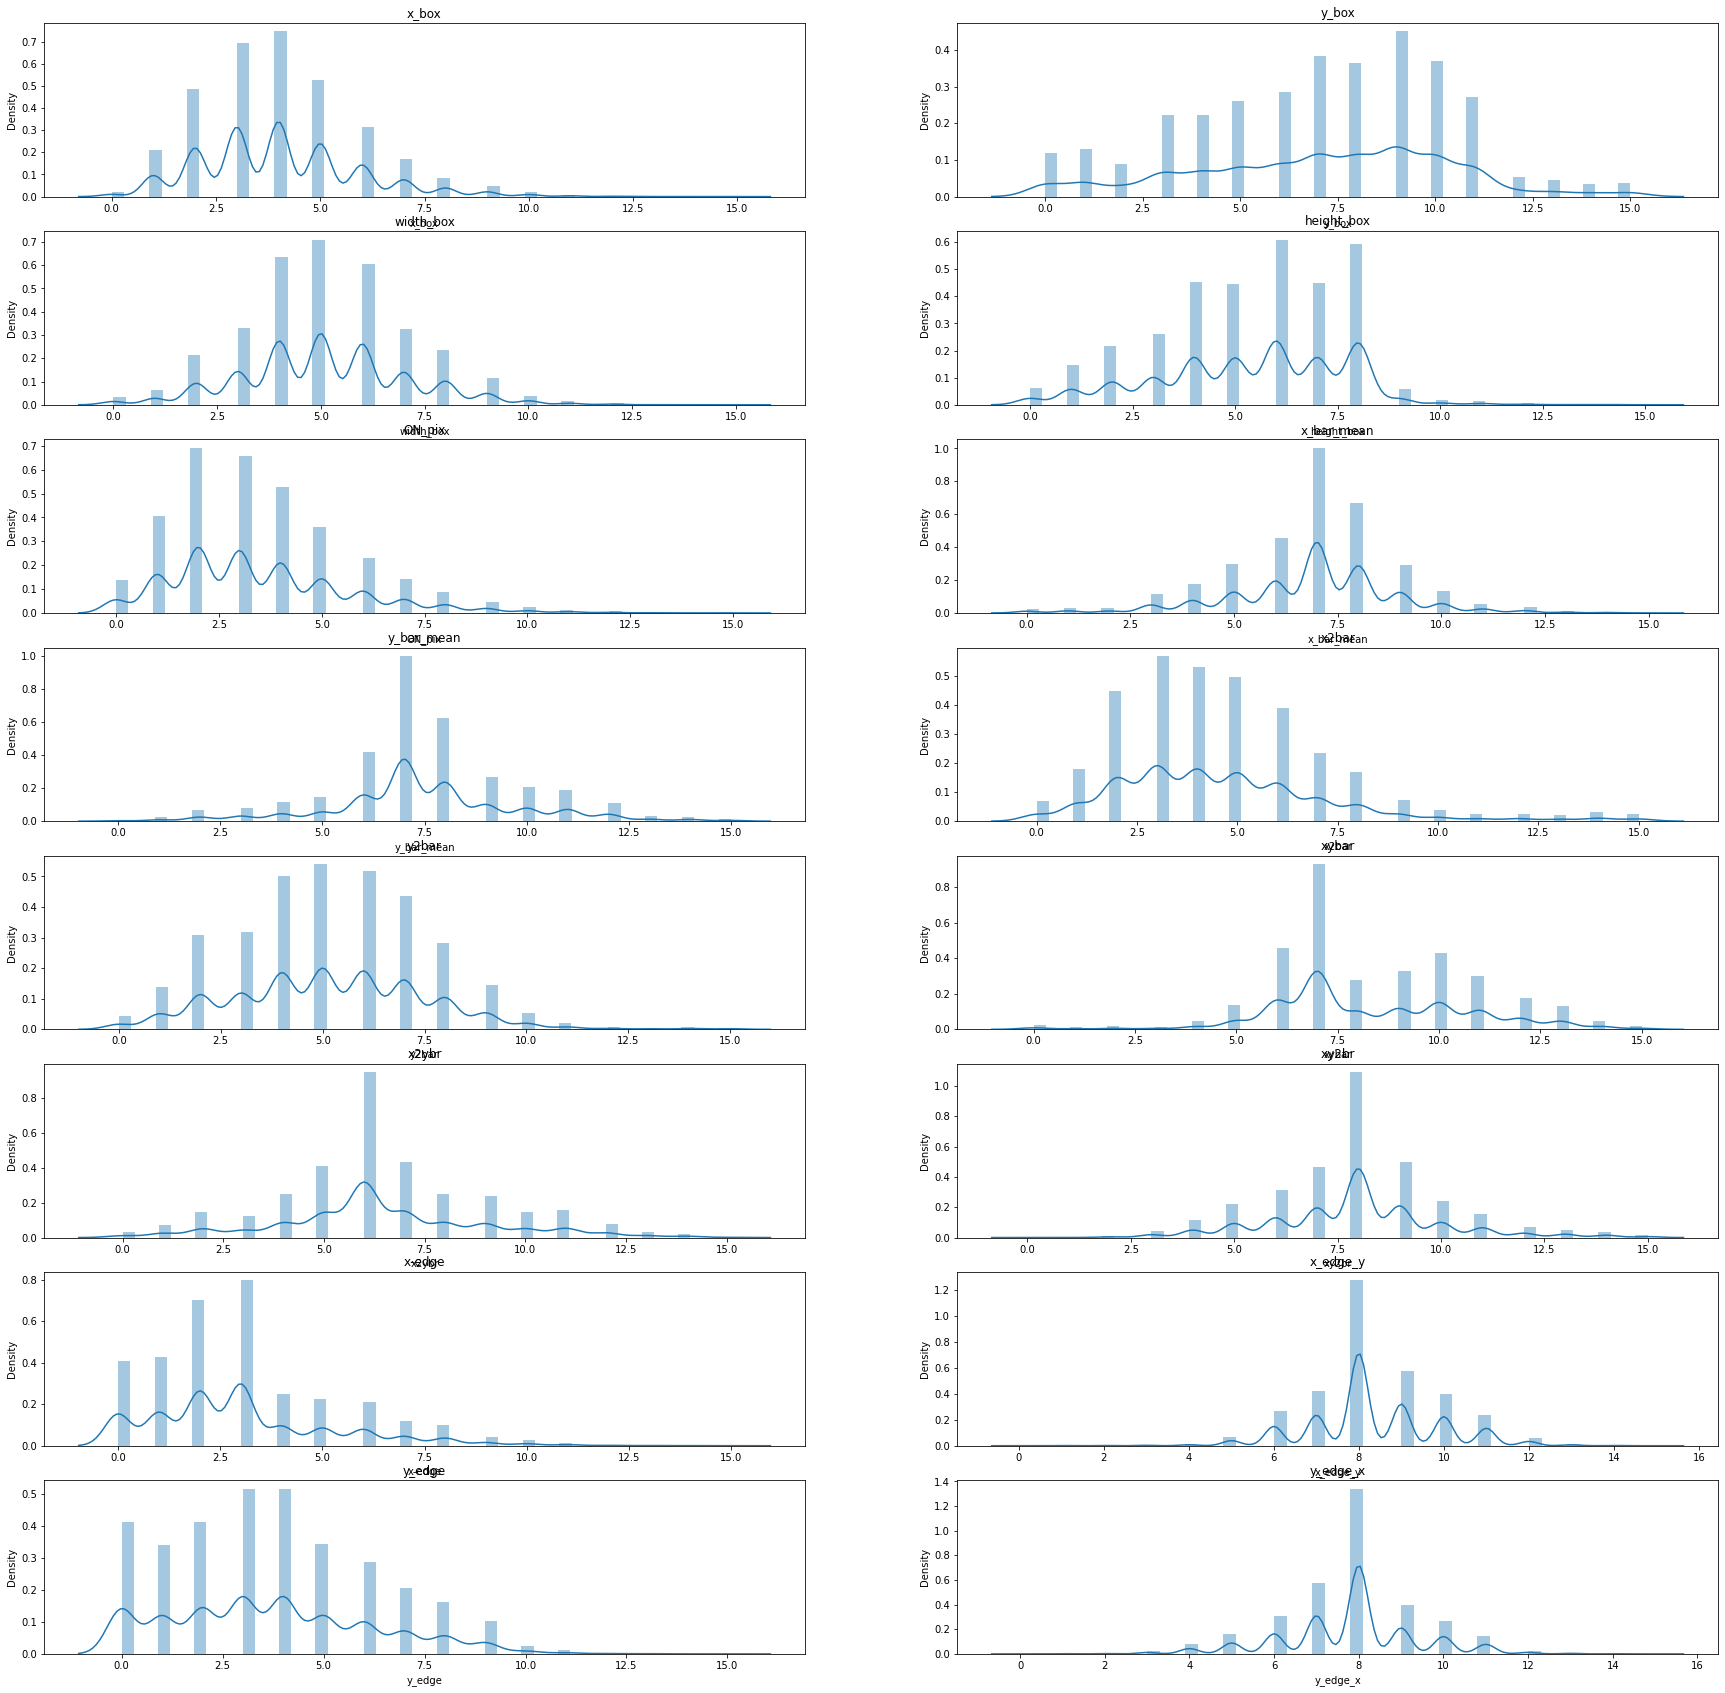

In [ ]:
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
  
fig = plt.figure(figsize=(30, 30))
fig.subplots(nrows=8, ncols=2)
for feat_i in range(number_of_features): #For each feature, we have a new subplot
    ax = plt.subplot(8,2, feat_i+1)
    plt.title(feature_names[feat_i]) 
    sns.distplot(X.iloc[:,feat_i]) #Once we have a specific feature, we draw the histogram of the feature's data (X[:,i] means we get the i'th column of X)
plt.show()

Most of the attributes have more than one peak, which make us conclude that their distributions are created of mixture models. We cannot search for global optimum in these features, so no MAP or MLE. <br>
Those attributes with one higher peak might converge to uni-modal distribution if we have more data, but the chances are small because the dataset is big enough for the number of classes.

<h2> Feature correlation <br></h2>
Too many features to visually present the correlation between each of them with scatterplot. Solution is calculating  Person's correlation coefficient 

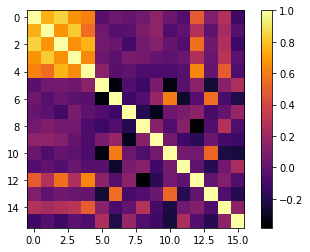

In [ ]:
correlation_matrix = np.zeros((number_of_features,number_of_features))
for i in range(number_of_features): #We need a 4x4 matrix to represent the correlation matrix, where we set the value of Cij to be the correlation between the i'th and the j'th metric
    measure = X.iloc[:,i]
    for j in range(number_of_features):
        measure2 = X.iloc[:,j]
        corr, _ = stats.pearsonr(measure, measure2)
        correlation_matrix[i][j] = corr
plt.figure()
plt.imshow(correlation_matrix, cmap = "inferno") #We can draw the matrix using imshow
plt.colorbar()
plt.show()

First four features are highly correlated which is expected when seeing the names of the columns. --> x_box, y_box, width_box, height_box. <br>
The diagonal has correlation of 1 because every feature is compared with itself. The orange and black squares has quite good correlation.

<br>
The Pearson r is used only when the data of the dependent and independent variables are quantitative. There are many types of correlation coefficient. The correct choice of correlation coefficient depends on the classification of the independent variable (X) and dependent variable (Y). Data are classified into one of three types: quantitative, nominal and ordinal. Our data is quantitative, which means Pearson r is good measurement.


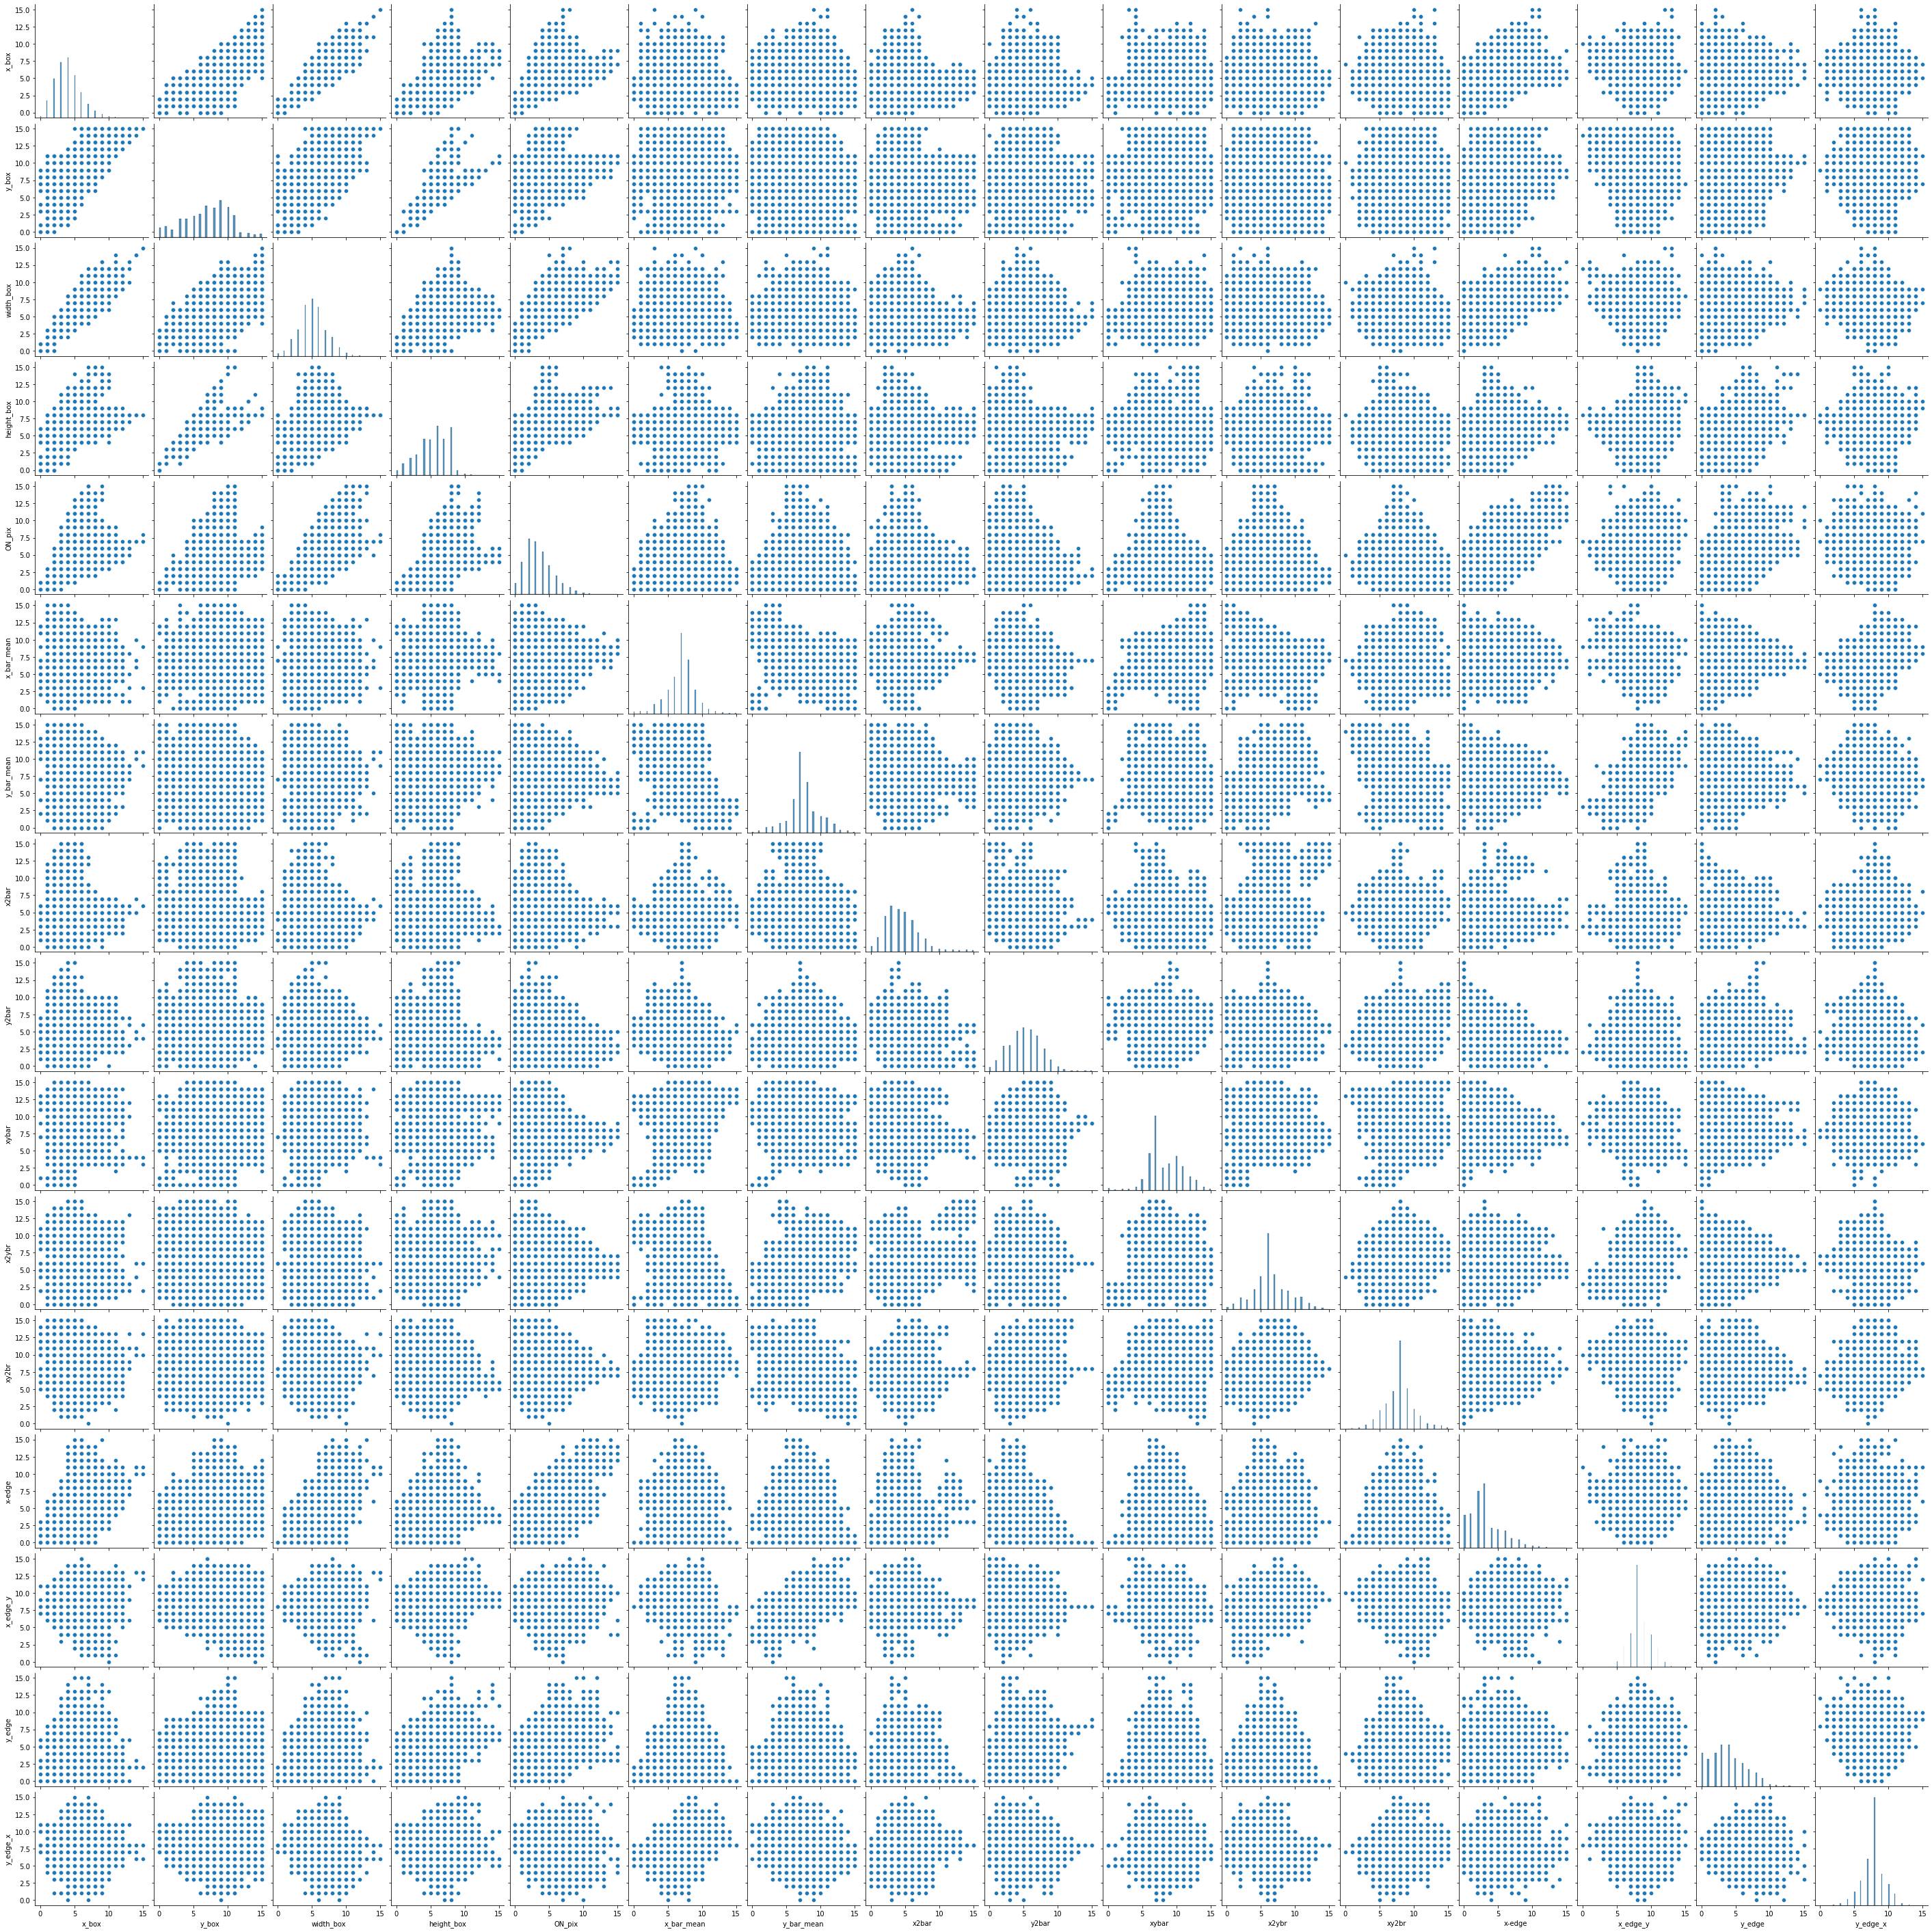

In [ ]:
sns.pairplot(X) 

# Feature selection

Feature selection can be made based on the correlation info, but instead of us choosing the features and making mistakes, we can use PCA to reduce the dimension of the dataset, but still keeping the important features combined in new axis based on Eigen vectors and values.

We start by Standardizing the data since PCA's output is influenced based on the scale of the features of the data.

It is a common practice to normalize the data before feeding it to any machine learning algorithm.

In [9]:
X_scaled = StandardScaler().fit_transform(X) 

In [ ]:
#Classes must be ordinals to call c=y in PCA for choosing colors
encoded_classes = dict()
i=0
for t in target_names:
  encoded_classes[t] = i
  i+=1

y = y.replace(encoded_classes)
print(y)


       capital_letter
0                   8
1                   3
2                  13
3                   6
4                  18
...               ...
19994               3
19995               2
19996              19
19997              18
19998               0

[19999 rows x 1 columns]


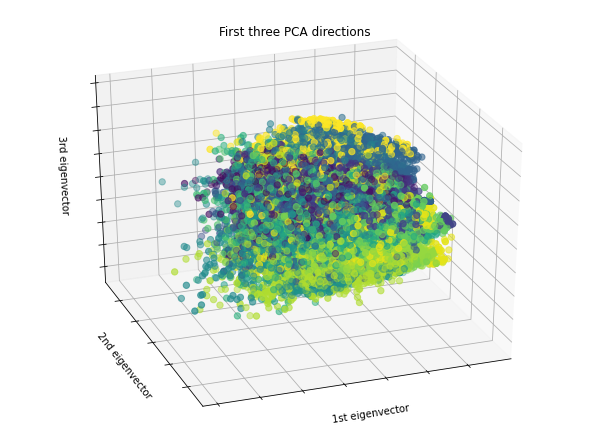

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

pca = PCA(n_components=3) #We set the number of components to 3 so we can transform to a 3D space
X_reduced = pca.fit(X_scaled).transform(X_scaled) # Now we fit the PCA model to X with fit() and apply it to X immediately with transform() 
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,  s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

Even when we reduced the feature space, still the visualization is not interpretable because the number of classes is quite big to distinct the colors. Anyways, reducing 17th dimensional space into 3 dimensional is not a good choice, so we will reduce it to 10 dimensions just for computational efficency, not for visualization.

In [ ]:
pca = PCA(n_components=10) 
X_reduced = pca.fit(X_scaled).transform(X_scaled)

# MODELS

Classification models: LDA, QDA, Naïve Bayes, Logistic Regression, Support Vector Machines – SVC , kNN, Neural Networks, classification trees (Random forests)

<h2> QDA

In [10]:
#divide the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25) 


In [ ]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)

qda_pred = np.array(qda_pred)
qda_pred.resize(5000,1)
y_test = np.array(y_test)

accuracy = np.sum(y_test == qda_pred)/len(y_test)
print(f"QDA accuracy: {accuracy}")

QDA accuracy: 0.8924


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<h2> LDA

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

lda_pred = np.array(lda_pred)
lda_pred.resize(5000,1)
y_test = np.array(y_test)

accuracy = np.sum(y_test == lda_pred)/len(y_test)
print(f"Accuracy of the LDA model: {accuracy}")

Accuracy of the LDA model: 0.7068


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 LDA produce linear decision boundaries so when the true decision boundaries are linear, then the LDA approaches will perform well. QDA, on the other-hand, provides a non-linear quadratic decision boundary. Thus, when the decision boundary is moderately non-linear, QDA may give better results.

This implies the dataset has some non-linear decision boundaries!

<h2> SVM

In [11]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC()
model.fit(X_train, y_train)
svc_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
print(svc_pred)

['Y' 'V' 'U' ... 'M' 'S' 'I']


In [13]:
print("Accuracy of the SVM model:",metrics.accuracy_score(y_test, svc_pred))

Accuracy of the SVM model: 0.938


<h2> Random forest

In [14]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

rf_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy of the Random Forest Model:",metrics.accuracy_score(y_test, rf_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy of the Random Forest Model: 0.9602


# RESULTS
QDA accuracy: 0.8924 <br>
LDA model: 0.7068 <br>
SVM model: 0.938 <br>
Random Forest Model: 0.9602 <br>
Conclusion: SVM and RFM are more complex models and the results are much better, as expected!
<br>
<br>
Made by: <br>
Tijana Atanasovska (196014)